#### Question 4
### Is there any relationship between the food abundancy and economic wealth?
In this analysis, we will be analyzing the correlation between GDP per capita and food abundance. 

In [1]:
# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns


In [2]:
df = pd.read_csv("./Resources/merged_data.csv")
df.head()

,Country,Year,Value,Population Size in Millions,2020 GDP in USD,GDP Per Capita,Production in Millions
0,Afghanistan,2020,54771898.0,3.892834,2.011614e+10,516.747871,5.477190
1,Albania,2020,12904896.0,0.283785,1.513187e+10,5332.160475,1.290490
2,Algeria,2020,201992285.0,4.385104,1.450092e+11,3306.858208,20.199229
3,Angola,2020,84297733.0,3.286627,5.361907e+10,1631.431691,8.429773
4,Antigua and Barbuda,2020,215545.0,0.009793,1.370281e+09,13992.744480,0.021555


In [3]:
regions_df = pd.read_csv("./Resources/world-regions.csv")
regions_df = regions_df.rename(columns={"Entity": "Country", "World Region according to the World Bank":"Regions"})
regions_df.head()

,Country,Code,Year,Regions
0,Afghanistan,AFG,2017,South Asia
1,Albania,ALB,2017,Europe and Central Asia
2,Algeria,DZA,2017,Middle East and North Africa
3,American Samoa,ASM,2017,East Asia and Pacific
4,Andorra,AND,2017,Europe and Central Asia


In [4]:
# Merge regions and country data sets
merged = pd.merge(df, regions_df[["Country", "Regions"]], on="Country")
merged

,Country,Year,Value,Population Size in Millions,2020 GDP in USD,GDP Per Capita,Production in Millions,Regions
0,Afghanistan,2020,54771898.0,3.892834,2.011614e+10,516.747871,5.477190,South Asia
1,Albania,2020,12904896.0,0.283785,1.513187e+10,5332.160475,1.290490,Europe and Central Asia
2,Algeria,2020,201992285.0,4.385104,1.450092e+11,3306.858208,20.199229,Middle East and North Africa
3,Angola,2020,84297733.0,3.286627,5.361907e+10,1631.431691,8.429773,Sub-Saharan Africa
4,Antigua and Barbuda,2020,215545.0,0.009793,1.370281e+09,13992.744480,0.021555,Latin America and Caribbean
...,...,...,...,...,...,...,...,...
155,Uruguay,2020,65533304.0,0.347373,5.356076e+10,15418.815309,6.553330,Latin America and Caribbean
156,Uzbekistan,2020,127834310.0,3.423205,5.989431e+10,1749.655815,12.783431,Europe and Central Asia
157,Vanuatu,2020,1115324.0,0.030715,8.968279e+08,2919.836800,0.111532,East Asia and Pacific
158,Zambia,2020,62945959.0,1.838396,1.811063e+10,985.132436,6.294596,Sub-Saharan Africa


In [5]:
# Check missing data
merged.count()

Country                        160
Year                           160
Value                          160
Population Size in Millions    160
2020 GDP in USD                157
GDP Per Capita                 157
Production in Millions         160
Regions                        160
dtype: int64

In [6]:
# Drop Missing Values
no_missing = merged.dropna(how="any")
no_missing.count()

Country                        157
Year                           157
Value                          157
Population Size in Millions    157
2020 GDP in USD                157
GDP Per Capita                 157
Production in Millions         157
Regions                        157
dtype: int64

Food abundance can be defined as total amount of live stock and crop produced per country.

In [7]:
# Remove World from dataset
no_world = no_missing.loc[no_missing['Country']!= "World",:]

In [8]:
# Group by Country to find the sum of all the food per country
grp_df = no_world.groupby(["Country"])
tot_food_grp = grp_df["Production in Millions"].sum()
tot_food_df = pd.DataFrame({"Country": list(tot_food_grp.index), "Total Food Produced (millions)": list(tot_food_grp)})
tot_food_df.sort_values(by="Total Food Produced (millions)", ascending=True)

,Country,Total Food Produced (millions)
101,Nauru,0.001143
88,Maldives,0.001374
91,Marshall Islands,0.002306
148,Tuvalu,0.007378
129,Seychelles,0.013416
...,...,...
112,Pakistan,180.446048
65,India,247.270061
20,Brazil,288.127739
66,Indonesia,412.711205


In [9]:
# The GDP Per Capita is calculated per country already. Therefore, we just need to find all it's values per country by taking the max
gdp_grp = grp_df[["GDP Per Capita", "Population Size in Millions"]].max()
gdp_df = pd.DataFrame({"Country":list(gdp_grp.index), "GDP Per Capita": list(gdp_grp['GDP Per Capita']), "Population Size (millions)":list(gdp_grp['Population Size in Millions'])})
gdp_df.sort_values("GDP Per Capita")

,Country,GDP Per Capita,Population Size (millions)
23,Burundi,233.837510,1.189078
134,Somalia,438.255166,1.589322
98,Mozambique,448.843891,3.125544
85,Madagascar,477.613041,2.769102
27,Central African Republic,481.746297,0.482976
...,...,...,...
37,Denmark,61063.316430,0.583140
110,Norway,67329.677791,0.537948
68,Ireland,85422.542868,0.498567
141,Switzerland,87100.414821,0.863656


In [10]:
dup_merged = merged[["Country", "Regions"]].loc[merged[["Country", "Regions"]].duplicated()==False, :]
dup_merged


,Country,Regions
0,Afghanistan,South Asia
1,Albania,Europe and Central Asia
2,Algeria,Middle East and North Africa
3,Angola,Sub-Saharan Africa
4,Antigua and Barbuda,Latin America and Caribbean
...,...,...
155,Uruguay,Latin America and Caribbean
156,Uzbekistan,Europe and Central Asia
157,Vanuatu,East Asia and Pacific
158,Zambia,Sub-Saharan Africa


In [11]:
# Merge data into one
gdp_food = pd.merge(tot_food_df, gdp_df, on="Country")
gdp_food = pd.merge(gdp_food, dup_merged, on="Country")
gdp_food

,Country,Total Food Produced (millions),GDP Per Capita,Population Size (millions),Regions
0,Afghanistan,5.477190,516.747871,3.892834,South Asia
1,Albania,1.290490,5332.160475,0.283785,Europe and Central Asia
2,Algeria,20.199229,3306.858208,4.385104,Middle East and North Africa
3,Angola,8.429773,1631.431691,3.286627,Sub-Saharan Africa
4,Antigua and Barbuda,0.021555,13992.744480,0.009793,Latin America and Caribbean
...,...,...,...,...,...
152,Uruguay,6.553330,15418.815309,0.347373,Latin America and Caribbean
153,Uzbekistan,12.783431,1749.655815,3.423205,Europe and Central Asia
154,Vanuatu,0.111532,2919.836800,0.030715,East Asia and Pacific
155,Zambia,6.294596,985.132436,1.838396,Sub-Saharan Africa


### Total Food Produced and GDP for all countries
Histogram of the data

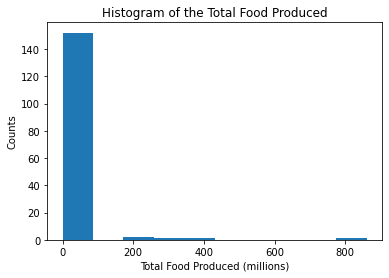

NormaltestResult(statistic=268.03537660810383, pvalue=6.264082835109123e-59)


In [12]:
# Total Food Histogram
plt.hist(gdp_food['Total Food Produced (millions)'])
plt.xlabel('Total Food Produced (millions)')
plt.ylabel('Counts')
plt.title("Histogram of the Total Food Produced")
plt.show()
print(st.normaltest(gdp_food["Total Food Produced (millions)"]))

Not normal

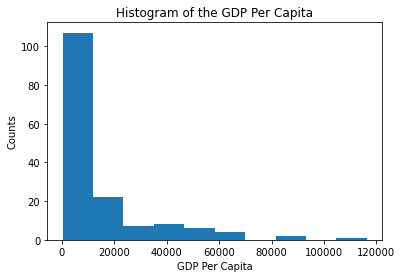

NormaltestResult(statistic=95.08074111646093, pvalue=2.2567289433758462e-21)


In [13]:
# GDP Per Capita Histogram
plt.hist(gdp_food['GDP Per Capita'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Counts')
plt.title("Histogram of the GDP Per Capita")
plt.show()
print(st.normaltest(gdp_food["GDP Per Capita"]))

Not normal.

Boxplots

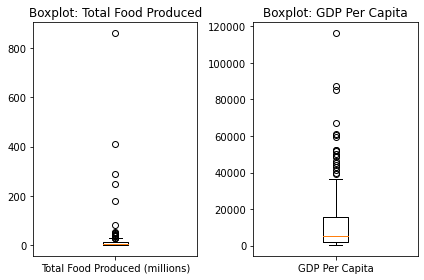

In [14]:
fig1, ax1 = plt.subplots(1, 2)
ax1[0].set_title("Boxplot: Total Food Produced")
ax1[1].set_title("Boxplot: GDP Per Capita")
ax1[0].boxplot(gdp_food["Total Food Produced (millions)"])
ax1[1].boxplot(gdp_food["GDP Per Capita"])
ax1[0].set_xticklabels(["Total Food Produced (millions)"])
ax1[1].set_xticklabels(["GDP Per Capita"])
plt.tight_layout()
plt.show()

In [15]:
quartiles = gdp_food["Total Food Produced (millions)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 0.8177737
The upper quartile is: 11.9752387
The interquartile range is: 11.157465
The the median is: 3.7378424 
Values below -15.9184238 could be outliers.
Values above 28.7114362 could be outliers.


In [16]:
quartiles = gdp_food["GDP Per Capita"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 1933.101068948096
The upper quartile is: 15742.45372563683
The interquartile range is: 13809.352656688734
The the median is: 5332.160474568449 
Values below -18780.927916085006 could be outliers.
Values above 36456.48271066993 could be outliers.


In [17]:
print("Top 10 Food Producing Countries and their GDP Per Capita:")
gdp_food.sort_values(by='Total Food Produced (millions)', ascending=False).head(10)

Top 10 Food Producing Countries and their GDP Per Capita:


,Country,Total Food Produced (millions),GDP Per Capita,Population Size (millions),Regions
30,China,861.524402,10408.669756,141.110000,East Asia and Pacific
66,Indonesia,412.711205,3870.557620,27.352362,East Asia and Pacific
20,Brazil,288.127739,6814.875632,21.255941,Latin America and Caribbean
65,India,247.270061,1933.101069,138.000439,South Asia
112,Pakistan,180.446048,1359.514522,22.089233,South Asia
94,Mexico,82.544780,8431.665017,12.893275,Latin America and Caribbean
11,Bangladesh,53.308693,2270.347535,16.468938,South Asia
99,Myanmar,49.438308,1450.662673,5.440979,East Asia and Pacific
143,Thailand,48.863964,7158.766684,6.979998,East Asia and Pacific
108,Nigeria,47.447814,2097.092473,20.613959,Sub-Saharan Africa


In [18]:
print("Top 10 GDP Per Capita Countries and their Food Production Amount:")
gdp_food.sort_values(by='GDP Per Capita', ascending=False).head(10)

Top 10 GDP Per Capita Countries and their Food Production Amount:


,Country,Total Food Produced (millions),GDP Per Capita,Population Size (millions),Regions
84,Luxembourg,0.048089,116356.158037,0.063042,Europe and Central Asia
141,Switzerland,1.961814,87100.414821,0.863656,Europe and Central Asia
68,Ireland,1.459587,85422.542868,0.498567,Europe and Central Asia
110,Norway,2.233112,67329.677791,0.537948,Europe and Central Asia
37,Denmark,3.062379,61063.316430,0.583140,Europe and Central Asia
131,Singapore,0.393863,60729.450349,0.568581,East Asia and Pacific
64,Iceland,0.080977,59264.034091,0.036646,Europe and Central Asia
103,Netherlands,13.947133,52396.032210,1.744150,Europe and Central Asia
140,Sweden,2.390851,52300.206199,1.035344,Europe and Central Asia
7,Australia,26.362003,51680.316523,2.569327,East Asia and Pacific


Is GDP Per Capita correlated to Total Amount of Food Produced?

In [19]:
x_values = gdp_food['Total Food Produced (millions)']
y_values = gdp_food['GDP Per Capita']


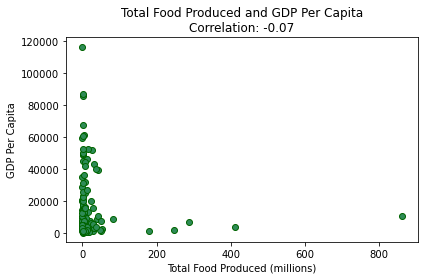

Correlation: -0.07


In [20]:
plt.scatter(x_values,y_values, c='seagreen', edgecolors="darkgreen")
plt.xlabel("Total Food Produced (millions)")
plt.ylabel("GDP Per Capita")
plt.title("Total Food Produced and GDP Per Capita\nCorrelation: -0.07")
plt.tight_layout()
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

Develop a linear regression model on the data to predict GDP Per Capita based on Total Food Availability per Country.

x = Total amount of food produced in the country

y = GDP per Capita

The r-value is: 0.0044825071332085424


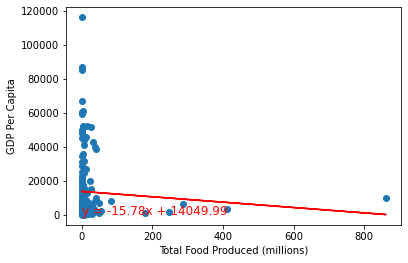

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+1,min(y_values)+1),fontsize=12,color="red")
plt.xlabel("Total Food Produced (millions)")
plt.ylabel("GDP Per Capita")
print(f"The r-value is: {rvalue**2}")
plt.show()

## Total Food Produced and GDP for South Asia Region

Histogram

In [22]:
gdp_food["Regions"].unique()

array(['South Asia', 'Europe and Central Asia',
       'Middle East and North Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'East Asia and Pacific',
       'North America'], dtype=object)

In [23]:
s_asia = gdp_food.loc[gdp_food["Regions"] == "South Asia"]
s_asia

,Country,Total Food Produced (millions),GDP Per Capita,Population Size (millions),Regions
0,Afghanistan,5.477190,516.747871,3.892834,South Asia
11,Bangladesh,53.308693,2270.347535,16.468938,South Asia
17,Bhutan,0.209621,3000.777986,0.077161,South Asia
65,India,247.270061,1933.101069,138.000439,South Asia
88,Maldives,0.001374,6924.105745,0.054054,South Asia
102,Nepal,13.531306,1147.471971,2.913681,South Asia
112,Pakistan,180.446048,1359.514522,22.089233,South Asia
137,Sri Lanka,3.737842,3694.040948,2.191900,South Asia


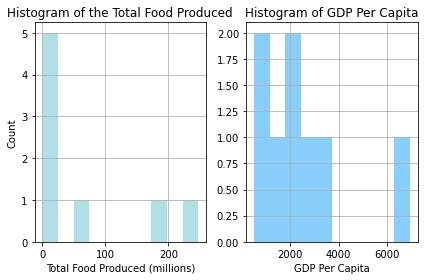

NormaltestResult(statistic=4.1166719614268725, pvalue=0.12766623231427585)
NormaltestResult(statistic=7.017255813736865, pvalue=0.029937963943313047)


c:\Users\krist\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [24]:
# Histogram
fig, ax = plt.subplots(1, 2)
s_asia.hist('Total Food Produced (millions)', ax=ax[0], color="powderblue")
s_asia.hist("GDP Per Capita", ax=ax[1], color="lightskyblue")
ax[0].set_title("Histogram of the Total Food Produced", wrap=True)
ax[1].set_title("Histogram of GDP Per Capita", wrap=True)
ax[0].set_xlabel("Total Food Produced (millions)")
ax[1].set_xlabel("GDP Per Capita")
ax[0].set_ylabel("Count")
fig.tight_layout()
plt.savefig("./Graphs/Question4-Images/histogram_south_asia.png")
plt.show()
print(st.normaltest(s_asia["Total Food Produced (millions)"]))
print(st.normaltest(s_asia["GDP Per Capita"]))

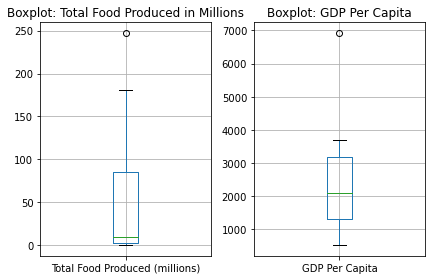

In [25]:
fig1, ax1 = plt.subplots(1, 2)
ax1[0].set_title("Boxplot: Total Food Produced in Millions")
ax1[1].set_title("Boxplot: GDP Per Capita")

s_asia.boxplot('Total Food Produced (millions)', ax=ax1[0])
s_asia.boxplot('GDP Per Capita', ax=ax1[1])
fig1.tight_layout()
ax1[0].set_xticklabels(["Total Food Produced (millions)"])
ax1[1].set_xticklabels(["GDP Per Capita"])
plt.show()

In [26]:
quartiles = s_asia["Total Food Produced (millions)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 2.855786975
The upper quartile is: 85.093031975
The interquartile range is: 82.237245
The the median is: 9.5042481 
Values below -120.500080525 could be outliers.
Values above 208.44889947500002 could be outliers.


In [27]:
quartiles = s_asia["GDP Per Capita"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 1306.503883991143
The upper quartile is: 3174.0937264473378
The interquartile range is: 1867.5898424561947
The the median is: 2101.7243018698796 
Values below -1494.880879693149 could be outliers.
Values above 5975.47849013163 could be outliers.


In [28]:
x_values=s_asia["Total Food Produced (millions)"]
y_values=s_asia["GDP Per Capita"]


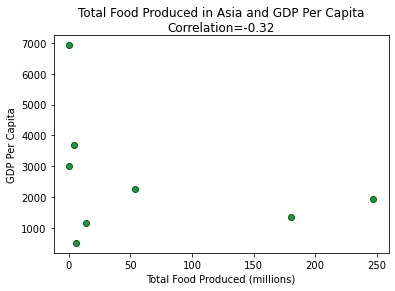

Correlation: -0.32


In [29]:
plt.scatter(x_values,y_values, c="seagreen", edgecolors="darkgreen")
plt.xlabel("Total Food Produced (millions)")
plt.ylabel("GDP Per Capita")
plt.title("Total Food Produced in Asia and GDP Per Capita\nCorrelation=-0.32", wrap=True)
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

Very weak negative correlation

The r-value is: 0.102282821835727


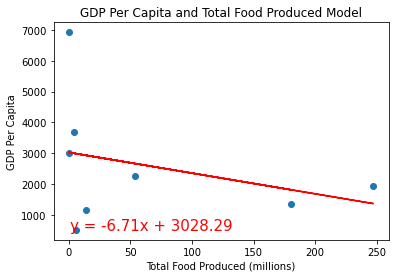

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values)+1,min(y_values)+1),fontsize=15,color="red")
plt.xlabel("Total Food Produced (millions)")
plt.ylabel("GDP Per Capita")
plt.title("GDP Per Capita and Total Food Produced Model")
print(f"The r-value is: {rvalue**2}")
plt.show()

### Top 40% of GDP Per Capita Countries - Focus on Economic Wealth

Not including the top 2%

In [31]:
top_40 = gdp_food.loc[(gdp_food["GDP Per Capita"] >= gdp_food["GDP Per Capita"].quantile(0.60)) & 
    (gdp_food["GDP Per Capita"]<gdp_food["GDP Per Capita"].quantile(0.98)), :]
top_40

,Country,Total Food Produced (millions),GDP Per Capita,Population Size (millions),Regions
4,Antigua and Barbuda,0.021555,13992.744480,0.009793,Latin America and Caribbean
5,Argentina,38.132414,8585.694742,4.537676,Latin America and Caribbean
7,Australia,26.362003,51680.316523,2.569327,East Asia and Pacific
8,Austria,1.548362,48588.659385,0.891686,Europe and Central Asia
10,Bahrain,1.004125,20406.502326,0.170158,Middle East and North Africa
12,Barbados,0.441713,16318.748105,0.028737,Latin America and Caribbean
14,Belgium,2.268623,45189.366900,1.154424,Europe and Central Asia
21,Bulgaria,1.442610,10079.203381,0.693402,Europe and Central Asia
26,Canada,30.938579,43258.263872,3.803720,North America
29,Chile,13.795590,13220.570758,1.911621,Latin America and Caribbean


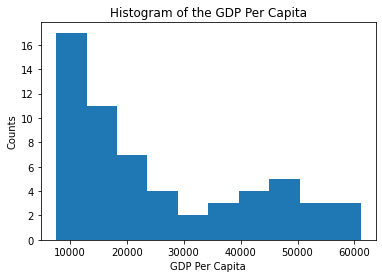

NormaltestResult(statistic=8.36420507483937, pvalue=0.015266375673192422)


In [32]:
plt.hist(top_40['GDP Per Capita'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Counts')
plt.title("Histogram of the GDP Per Capita")
plt.show()
print(st.normaltest(top_40["GDP Per Capita"]))

In [33]:
x_values = top_40["Total Food Produced (millions)"]
y_values = top_40["GDP Per Capita"]

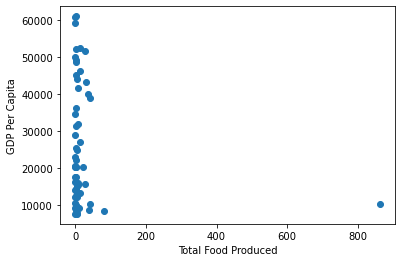

Correlation: -0.13


In [34]:
plt.scatter(x_values,y_values)
plt.xlabel("Total Food Produced")
plt.ylabel("GDP Per Capita")
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

## Human Development Index
Those with score of 0.8 or higher is considered a First World Country
- Low human development (0-.55)
- Medium human development (.55-.70)
- High human development (.70-80)
- Very high human development (.80-1.0)

In [35]:
hdi_df = pd.read_csv("./Resources/hdi.csv")
hdi_df.head()

,Country,Country Code,HDI
0,Afghanistan,AFG,0.511
1,Angola,AGO,0.581
2,Albania,ALB,0.795
3,Andorra,AND,0.868
4,United Arab Emirates,ARE,0.890


In [36]:
# Merge with food and gdp data
merge_hdi = pd.merge(gdp_food, hdi_df[["Country", "HDI"]], on="Country")

In [37]:
merge_hdi.head()

,Country,Total Food Produced (millions),GDP Per Capita,Population Size (millions),Regions,HDI
0,Afghanistan,5.477190,516.747871,3.892834,South Asia,0.511
1,Albania,1.290490,5332.160475,0.283785,Europe and Central Asia,0.795
2,Algeria,20.199229,3306.858208,4.385104,Middle East and North Africa,0.748
3,Angola,8.429773,1631.431691,3.286627,Sub-Saharan Africa,0.581
4,Antigua and Barbuda,0.021555,13992.744480,0.009793,Latin America and Caribbean,0.778


#### Group Data by the 4 levels of HDI
- Low human development (0-.55)
- Medium human development (.55-.70)
- High human development (.70-80)
- Very high human development (.80-1.0)

In [38]:
low_hdi = merge_hdi.loc[merge_hdi['HDI']<= 0.55, :]
med_hdi = merge_hdi.loc[(merge_hdi['HDI']>0.55)&(merge_hdi['HDI']<=0.7), :]
high_hdi = merge_hdi.loc[(merge_hdi['HDI']>0.7)&(merge_hdi['HDI']<=0.8), :]
very_high_hdi = merge_hdi.loc[(merge_hdi['HDI']>0.8), :]

In [39]:
print(f"Low:\n{low_hdi.max()}")
print(f"\nMedium:\n{med_hdi.max()}")
print(f"\nHigh:\n{high_hdi.max()}")
print(f"\nVery High:\n{very_high_hdi.max()}")

Low:
Country                                       Uganda
Total Food Produced (millions)             47.447814
GDP Per Capita                           3219.701128
Population Size (millions)                 20.613959
Regions                           Sub-Saharan Africa
HDI                                            0.546
dtype: object

Medium:
Country                                     Zimbabwe
Total Food Produced (millions)            247.270061
GDP Per Capita                           7198.335884
Population Size (millions)                138.000439
Regions                           Sub-Saharan Africa
HDI                                            0.686
dtype: object

High:
Country                                   Uzbekistan
Total Food Produced (millions)            861.524402
GDP Per Capita                          15285.940487
Population Size (millions)                    141.11
Regions                           Sub-Saharan Africa
HDI                                            0.7

In [40]:
# Create a column with it's value
low_hdi['HDI Range'] = ['Low' for x in range(0, len(low_hdi))]
med_hdi['HDI Range'] = ["Medium" for x in range(0, len(med_hdi))]
high_hdi['HDI Range'] = ["High" for x in range(0, len(high_hdi))]
very_high_hdi["HDI Range"] = ["Very High" for x in range(0, len(very_high_hdi))]
hdi_range_df = pd.concat([low_hdi, med_hdi, high_hdi, very_high_hdi], axis = 0)
len(hdi_range_df)

C:\Users\krist\AppData\Local\Temp\ipykernel_32516\1411921957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_hdi['HDI Range'] = ['Low' for x in range(0, len(low_hdi))]
C:\Users\krist\AppData\Local\Temp\ipykernel_32516\1411921957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_hdi['HDI Range'] = ["Medium" for x in range(0, len(med_hdi))]
C:\Users\krist\AppData\Local\Temp\ipykernel_32516\1411921957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

150

### South Asia HDI

In [41]:
s_asia_hdi = hdi_range_df.loc[hdi_range_df["Regions"] == "South Asia"]
s_asia_hdi

,Country,Total Food Produced (millions),GDP Per Capita,Population Size (millions),Regions,HDI,HDI Range
0,Afghanistan,5.477190,516.747871,3.892834,South Asia,0.511,Low
11,Bangladesh,53.308693,2270.347535,16.468938,South Asia,0.632,Medium
17,Bhutan,0.209621,3000.777986,0.077161,South Asia,0.654,Medium
63,India,247.270061,1933.101069,138.000439,South Asia,0.645,Medium
99,Nepal,13.531306,1147.471971,2.913681,South Asia,0.602,Medium
108,Pakistan,180.446048,1359.514522,22.089233,South Asia,0.557,Medium
86,Maldives,0.001374,6924.105745,0.054054,South Asia,0.740,High
131,Sri Lanka,3.737842,3694.040948,2.191900,South Asia,0.782,High


In [42]:
hdi_range_df["HDI Range"].unique()

array(['Low', 'Medium', 'High', 'Very High'], dtype=object)

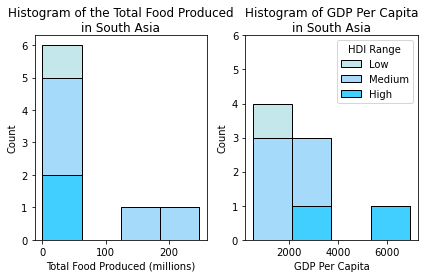

NormaltestResult(statistic=4.1166719614268725, pvalue=0.12766623231427585)
NormaltestResult(statistic=7.017255813736865, pvalue=0.029937963943313047)


c:\Users\krist\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [43]:
# Histogram
fig, ax = plt.subplots(1, 2)
colors=sns.color_palette(['powderblue', 'lightskyblue', 'deepskyblue'])
sns.histplot(data=s_asia_hdi, x='Total Food Produced (millions)', ax=ax[0], hue="HDI Range", multiple="stack", palette=colors, legend=None)
sns.histplot(data=s_asia_hdi, x="GDP Per Capita", ax=ax[1], hue="HDI Range", multiple="stack", palette=colors)
ax[0].set_title("Histogram of the Total Food Produced\nin South Asia", wrap=True)
ax[1].set_title("Histogram of GDP Per Capita\nin South Asia", wrap=True)
ax[0].set_xlabel("Total Food Produced (millions)")
ax[1].set_xlabel("GDP Per Capita")
ax[0].set_ylabel("Count")
ax[1].set_ylim(0, 6)
fig.tight_layout()
plt.savefig("./Graphs/Question4-Images/histogram_south_asia_hdi.png")
plt.show()
print(st.normaltest(s_asia["Total Food Produced (millions)"]))
print(st.normaltest(s_asia["GDP Per Capita"]))

c:\Users\krist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


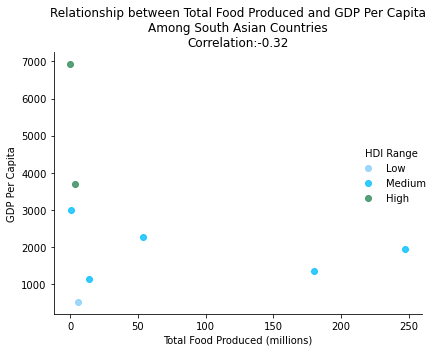

In [44]:
x_values=s_asia_hdi['Total Food Produced (millions)']
y_values=s_asia_hdi['GDP Per Capita']
colors=sns.color_palette(['lightskyblue', 'deepskyblue', 'seagreen'])
sns.lmplot("Total Food Produced (millions)", "GDP Per Capita", data=s_asia_hdi, hue="HDI Range",
    fit_reg=False, palette=colors).set(
    title=f"Relationship between Total Food Produced and GDP Per Capita\nAmong South Asian Countries\nCorrelation:{round(st.pearsonr(x_values,y_values)[0],2)}")
plt.tight_layout()
plt.savefig("./Graphs/Question4-Images/food_gdp_hdi_correlation.png")
plt.show()

### Correlation Analysis for Total Food Produced and HDI

In [45]:
x_values = merge_hdi['Total Food Produced (millions)']
y_values = merge_hdi['HDI']

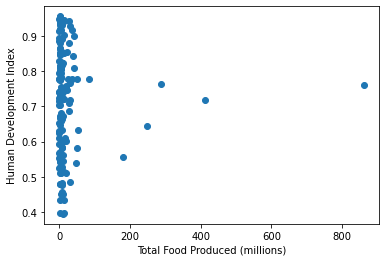

Correlation: -0.0


In [46]:
plt.scatter(x_values,y_values)
plt.xlabel("Total Food Produced (millions)")
plt.ylabel("Human Development Index")
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

No correlation between HDI and Food Produced

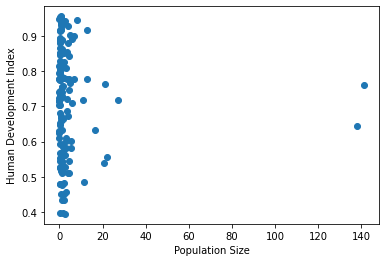

Correlation: -0.04


In [47]:
x_values=merge_hdi['Population Size (millions)']
y_values = merge_hdi['HDI']
plt.scatter(x_values, y_values)
plt.xlabel("Population Size")
plt.ylabel("Human Development Index")
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

In [48]:
# Look within first 95% quantile
top_95 = merge_hdi.loc[merge_hdi['Population Size (millions)']<merge_hdi['Population Size (millions)'].quantile(0.95), :]

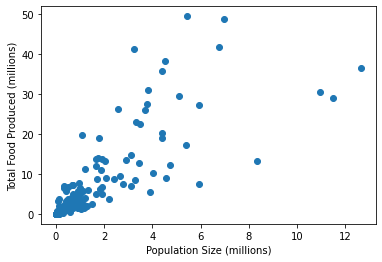

Correlation: 0.78


In [49]:
x_values=top_95['Population Size (millions)']
y_values=top_95['Total Food Produced (millions)']
plt.scatter(x_values, y_values)
plt.xlabel("Population Size (millions)")
plt.ylabel("Total Food Produced (millions)")
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

### Correlation Analysis with GDP Per Capita and HDI
Should be correlated

In [50]:
x_values = merge_hdi['GDP Per Capita']
y_values = merge_hdi['HDI']

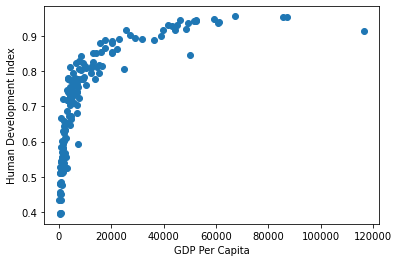

Correlation: 0.7


In [51]:
plt.scatter(x_values,y_values)
plt.xlabel("GDP Per Capita")
plt.ylabel("Human Development Index")
plt.show()
print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

Strong Correlation; graph looks like it is exponential. At some point in gdp, the HDI index starts to level slow down in it's rate of increase.

Complete Correlation analyses on all 4 regions

c:\Users\krist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


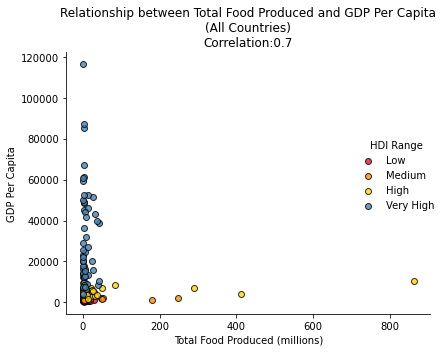

In [52]:
sns.set_palette(sns.color_palette(['crimson', 'darkorange', 'gold', 'steelblue']))
sns.lmplot("Total Food Produced (millions)", "GDP Per Capita", data=hdi_range_df, hue="HDI Range", scatter_kws={'linewidths':1,'edgecolor':'black'},
    fit_reg=False).set(
    title=f"Relationship between Total Food Produced and GDP Per Capita\n(All Countries)\nCorrelation:{round(st.pearsonr(x_values,y_values)[0],2)}")
plt.tight_layout()
plt.savefig("./Graphs/Question4-Images/tot_food_gdp_hdi_correlation.png")
plt.show()

c:\Users\krist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


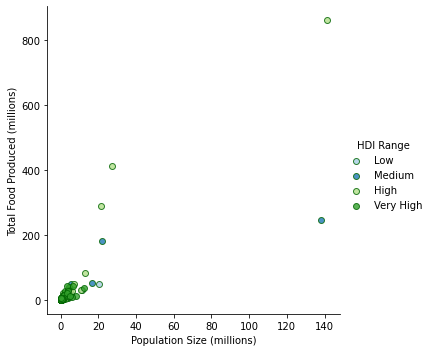

In [97]:
# Population
sns.lmplot("Population Size (millions)","Total Food Produced (millions)", data=hdi_range_df, hue="HDI Range", scatter_kws={'linewidths':1,'edgecolor':'darkgreen'}, fit_reg=False)
plt.show()

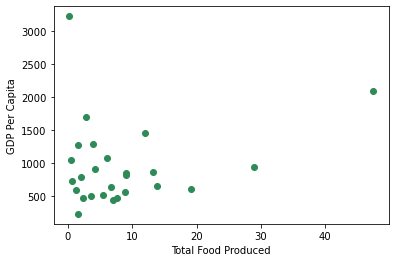

Correlation: 0.19


In [102]:
low_x_values = low_hdi['Total Food Produced (millions)']
low_y_values = low_hdi['GDP Per Capita']
plt.scatter(low_x_values,low_y_values, c="seagreen")
plt.ylabel("GDP Per Capita")
plt.xlabel("Total Food Produced")
plt.show()
print(f"Correlation: {round(st.pearsonr(low_x_values,low_y_values)[0],2)}")

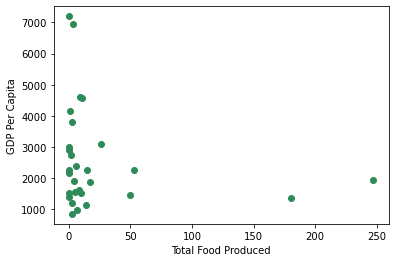

Correlation: -0.19


In [104]:
med_x_values = med_hdi['Total Food Produced (millions)']
med_y_values = med_hdi['GDP Per Capita']
plt.scatter(med_x_values,med_y_values, c="seagreen")
plt.ylabel("GDP Per Capita")
plt.xlabel("Total Food Produced")
plt.show()
print(f"Correlation: {round(st.pearsonr(med_x_values,med_y_values)[0],2)}")

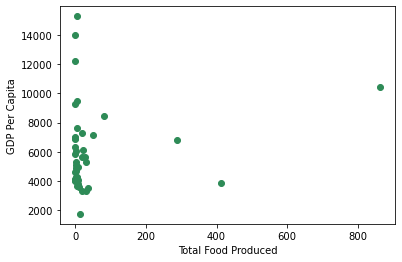

Correlation: 0.17


In [105]:
high_x_values = high_hdi['Total Food Produced (millions)']
high_y_values = high_hdi['GDP Per Capita']
plt.scatter(high_x_values,high_y_values, c="seagreen")
plt.ylabel("GDP Per Capita")
plt.xlabel("Total Food Produced")
plt.show()
print(f"Correlation: {round(st.pearsonr(high_x_values,high_y_values)[0],2)}")

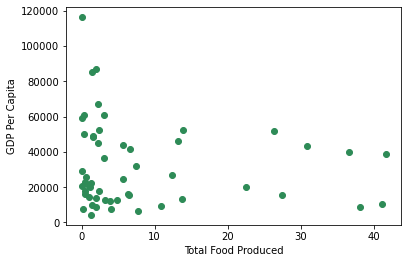

Correlation: -0.11


In [106]:
very_high_x_values = very_high_hdi['Total Food Produced (millions)']
very_high_y_values = very_high_hdi['GDP Per Capita']
plt.scatter(very_high_x_values,very_high_y_values, c="seagreen")
plt.ylabel("GDP Per Capita")
plt.xlabel("Total Food Produced")
plt.show()
print(f"Correlation: {round(st.pearsonr(very_high_x_values,very_high_y_values)[0],2)}")

In [109]:
# Create a Scatterplot Function
def show_scat(x_values, y_values):
    plt.scatter(x_values,y_values, c="seagreen")
    plt.xlabel("GDP Per Capita")
    plt.ylabel("Human Development Index")
    plt.show()
    print(f"Correlation: {round(st.pearsonr(x_values,y_values)[0],2)}")

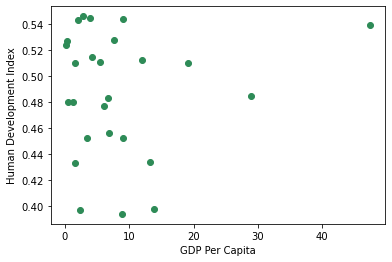

Correlation: 0.07


In [110]:
show_scat(low_hdi['Total Food Produced (millions)'], low_hdi["HDI"])